<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/adolescents_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


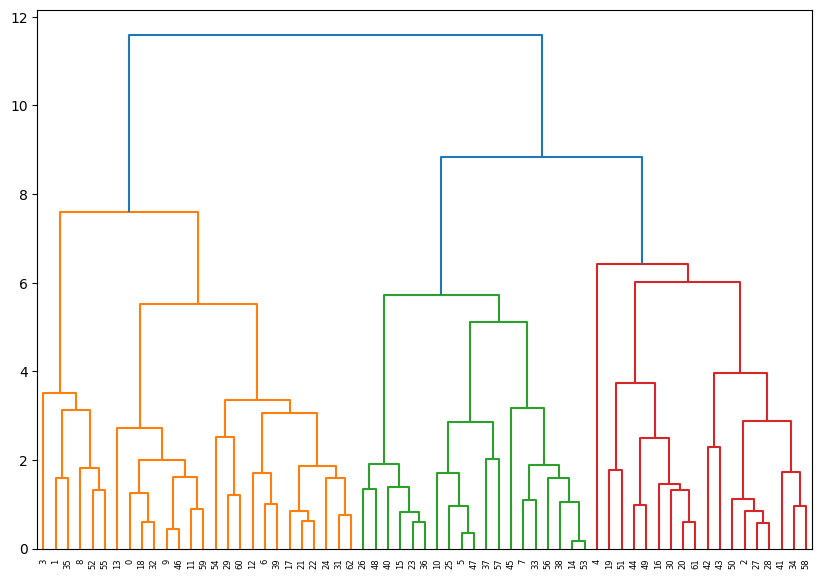

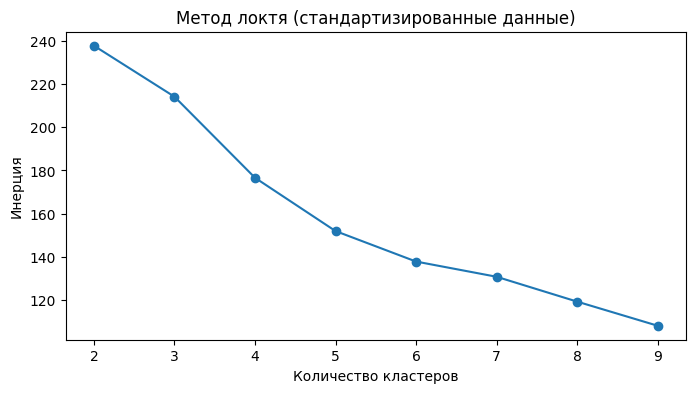

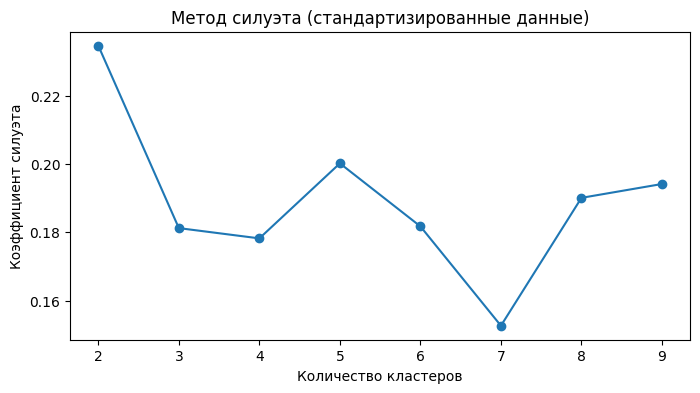

Participants in each cluster:
Cluster 0:
['ИЕ' 'МВ' 'КВ' 'ЯВ' 'СкА' 'БК' 'АТ' 'ША' 'МЕ' 'ЧМ' 'ЗП' 'ХА' 'ВВ' 'ПМ'
 'МО' 'ЛА ' 'ПП' 'БК (дислексия скоррект) ' 'Зуб Мар' 'Цыт Але' 'Рож Фед'
 'Вих Мар' 'Пет Але' 'Гри Але' 'Пол Бог' 'Шар Сем']
Cluster 1:
['ЩЗ' 'ИМ' 'ПФ' 'ЗО' 'АЛ' 'УФ' 'ИС' 'КА' 'КС' 'Лип Мар' 'Вой Пет'
 'Гря Анд' 'Гря Ари' 'Кал Вар' 'Фоф Мар' 'Фоф Гли' 'Ели Мар' 'Кры Яро']
Cluster 2:
['ДЛ' 'СА' 'ВА' 'КА' 'КАн' 'КМ' 'ШЕ' 'СИл' 'ТЛ ' 'БС' 'Чел Дан' 'Боб Дар'
 'Пан Соф' 'Цыт Пет' 'Мед Ник' 'Шев Вал' 'Кур Ели' 'Пет Люб' 'Пет Евг']
=== Kruskal-Wallis Test for Each Variable ===

Kruskal-Wallis test results for Time-test: Ош 2 1: KruskalResult(statistic=33.54970809795242, pvalue=5.18529479271273e-08)

Pairwise comparisons (Time-test: Ош 2 1):
Comparison: Cluster 0 vs Cluster 1 - Time-test: Ош 2 1: U = 11.5, p-value = 0.000 (Significant)
Comparison: Cluster 0 vs Cluster 2 - Time-test: Ош 2 1: U = 138.0, p-value = 0.012 (Significant)
Comparison: Cluster 1 vs Cluster 2 - Time-test: О

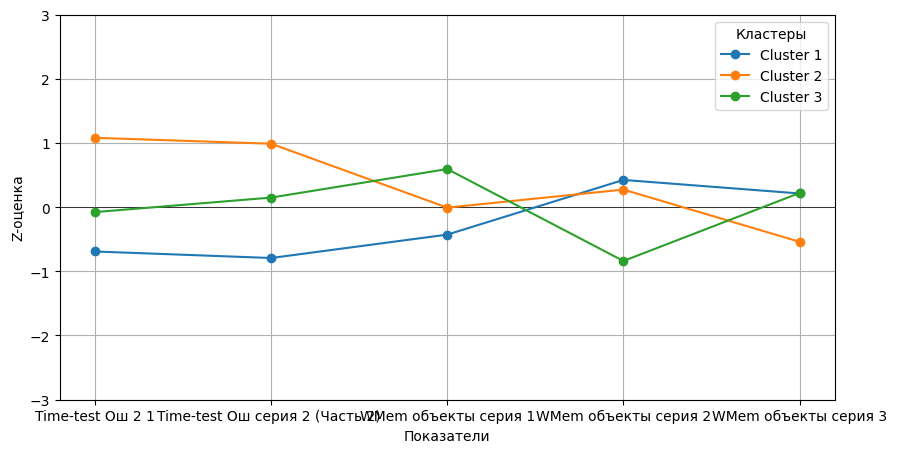

In [3]:
# Подключение к Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from scipy.stats import kruskal, mannwhitneyu
from sklearn.decomposition import PCA

# Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/adolescents_cluster_websearch.csv"
data = pd.read_csv(file_path)

# Извлечение данных для анализа
variables = ['Time-test: Ош 2 1',
             'Time-test: Количество ошибок, серия 2 (Часть 2) ',
             'WMem: Количество объектов, серия 1',
             'WMem: Количество объектов, серия 2',
             'WMem: Количество объектов, серия 3']

X = data[variables].values

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Построение дендрограммы
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

# Определение оптимального количества кластеров методом локтя
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Метод локтя (стандартизированные данные)")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.show()

# Определение оптимального количества кластеров методом силуэта
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Метод силуэта (стандартизированные данные)")
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.show()

# Оптимальное количество кластеров (например, 3)
optimal_clusters = 3

# Иерархическая кластеризация
agglo = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
clusters = agglo.fit_predict(X_scaled)



# Добавление кластеров в данные
data['Cluster'] = clusters

# Вывод номеров участников в каждом кластере
print("Participants in each cluster:")
for i in range(optimal_clusters):
    print(f"Cluster {i}:")
    print(data.loc[data['Cluster'] == i].iloc[:, 0].values)  # Предполагается, что ID участников в первом столбце

# Выполнение Kruskal-Wallis теста и парных сравнений
print("=== Kruskal-Wallis Test for Each Variable ===")
for column in variables:
    data_groups = [data[data['Cluster'] == i][column] for i in range(optimal_clusters)]
    kruskal_results = kruskal(*data_groups)
    print(f"\nKruskal-Wallis test results for {column}: {kruskal_results}")

    # Выполнение парных сравнений, если Kruskal-Wallis показывает значимость
    if kruskal_results.pvalue < 0.05:
        p_values = []
        clusters_unique = data['Cluster'].unique()
        for i in range(len(clusters_unique)):
            for j in range(i + 1, len(clusters_unique)):
                u_stat, p_val = mannwhitneyu(
                    data[data['Cluster'] == clusters_unique[i]][column],
                    data[data['Cluster'] == clusters_unique[j]][column]
                )
                p_values.append((f"Comparison: Cluster {clusters_unique[i]} vs Cluster {clusters_unique[j]} - {column}", u_stat, p_val))

        # Печать результатов парных сравнений
        print(f"\nPairwise comparisons ({column}):")
        for comparison, u_stat, p_value in p_values:
            significance = "Significant" if p_value < 0.05 else "Not Significant"
            print(f"{comparison}: U = {u_stat:.1f}, p-value = {p_value:.3f} ({significance})")

# Функция для визуализации Z-Score данных с диапазоном от -3 до 3
def plot_standardized_scores(profiles, measures):
    plt.figure(figsize=(10, 5))

    for profile_name, profile_data in profiles.items():
        mean_scores = np.mean(profile_data, axis=0)
        plt.errorbar(measures, mean_scores, label=profile_name, fmt='o-', capsize=5)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.ylim(-3, 3)  # Ограничение диапазона оси Y от -3 до 3
    plt.xlabel('Показатели')
    plt.ylabel('Z-оценка')
    plt.grid(True)
    plt.legend(title='Кластеры')
    plt.show()

# Подготовка данных для построения графиков
measures = ['Time-test Ош 2 1',
            'Time-test Ош серия 2 (Часть 2) ',
            'WMem объекты серия 1',
            'WMem объекты серия 2',
            'WMem объекты серия 3']

# Кластеры
profiles = {}
for i in range(optimal_clusters):
    profiles[f'Cluster {i+1}'] = X_scaled[clusters == i]

# Построение графиков Z-Score
plot_standardized_scores(profiles, measures)


In [4]:
# Подсчет количества участников в каждом кластере
cluster_counts = data['Cluster'].value_counts().sort_index()

# Подсчет общего числа участников
total_participants = len(data)

# Вывод результатов
print("Количество участников в каждом кластере и процент от общего числа:")

for i in range(optimal_clusters):
    count = cluster_counts[i]
    percentage = (count / total_participants) * 100
    print(f"Кластер {i+1}: {count} человек, {percentage:.2f}% от общего числа")



Количество участников в каждом кластере и процент от общего числа:
Кластер 1: 26 человек, 41.27% от общего числа
Кластер 2: 18 человек, 28.57% от общего числа
Кластер 3: 19 человек, 30.16% от общего числа


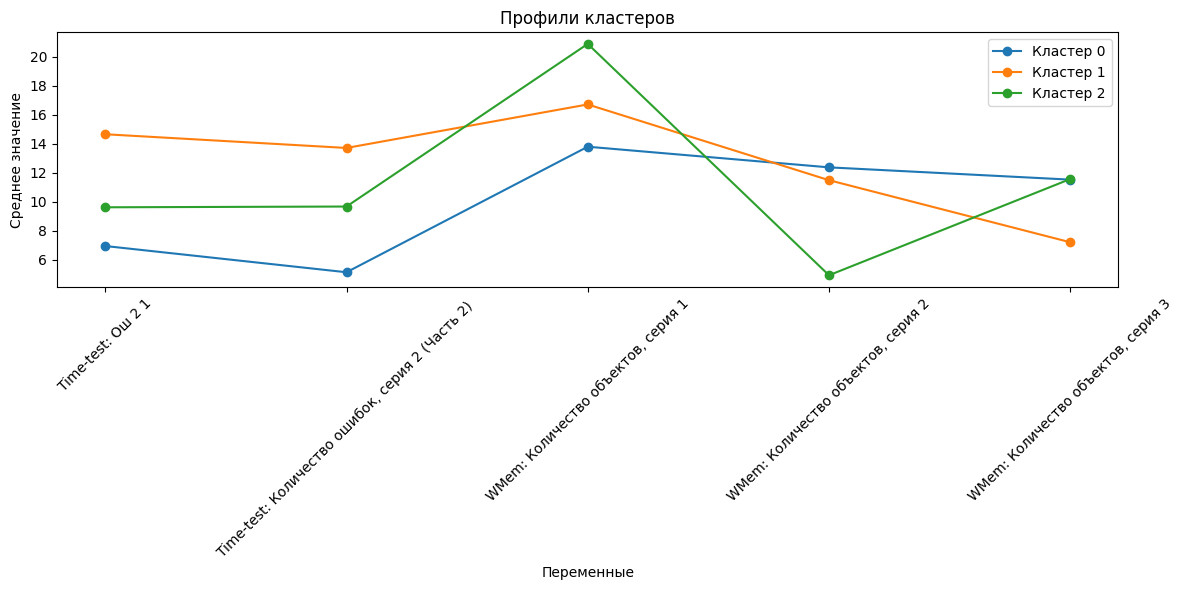

In [ ]:
def plot_cluster_profiles(data, variables):
    clusters = data['Cluster'].unique()
    plt.figure(figsize=(12, 6))

    for cluster in clusters:
        cluster_data = data[data['Cluster'] == cluster]
        mean_scores = cluster_data[variables].mean()
        plt.plot(variables, mean_scores, marker='o', label=f'Кластер {cluster}')

    plt.title('Профили кластеров')
    plt.xlabel('Переменные')
    plt.ylabel('Среднее значение')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_cluster_profiles(data, variables)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

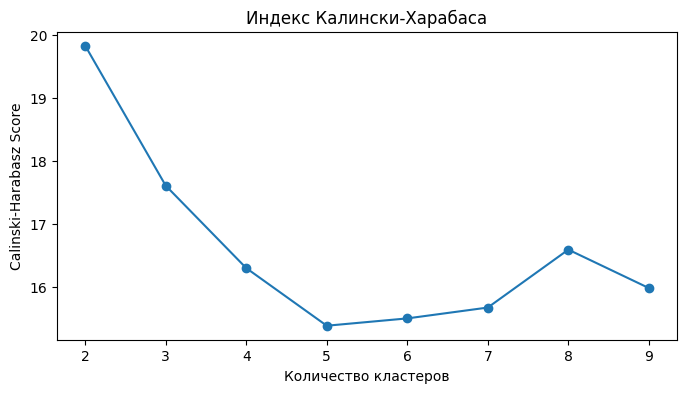

Оптимальное количество кластеров по индексу Калински-Харабаса: 2


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    ch_scores.append(score)

# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(K, ch_scores, marker='o')
plt.title("Индекс Калински-Харабаса")
plt.xlabel("Количество кластеров")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

# Определение оптимального количества кластеров
optimal_k_ch = K[np.argmax(ch_scores)]
print(f"Оптимальное количество кластеров по индексу Калински-Харабаса: {optimal_k_ch}")


In [ ]:
# Выполнение Kruskal-Wallis теста и парных сравнений с поправкой Бонферрони
print("=== Kruskal-Wallis Test for Each Variable ===")
for column in variables:
    data_groups = [data[data['Cluster'] == i][column] for i in range(optimal_clusters)]
    kruskal_results = kruskal(*data_groups)
    print(f"\nKruskal-Wallis test results for {column}: {kruskal_results}")

    # Выполнение парных сравнений, если Kruskal-Wallis показывает значимость
    if kruskal_results.pvalue < 0.05:
        p_values = []
        clusters_unique = data['Cluster'].unique()
        n_comparisons = int(len(clusters_unique) * (len(clusters_unique) - 1) / 2)  # Количество парных сравнений
        for i in range(len(clusters_unique)):
            for j in range(i + 1, len(clusters_unique)):
                u_stat, p_val = mannwhitneyu(
                    data[data['Cluster'] == clusters_unique[i]][column],
                    data[data['Cluster'] == clusters_unique[j]][column],
                    alternative='two-sided'
                )
                # Поправка Бонферрони
                p_val_adj = min(p_val * n_comparisons, 1.0)
                p_values.append((f"Сравнение: Кластер {clusters_unique[i]} vs Кластер {clusters_unique[j]} - {column}",
                                 u_stat, p_val, p_val_adj))

        # Печать результатов парных сравнений с поправкой Бонферрони
        print(f"\nПарные сравнения с поправкой Бонферрони ({column}):")
        for comparison, u_stat, p_value, p_value_adj in p_values:
            significance = "Значимо" if p_value_adj < 0.05 else "Не значимо"
            print(f"{comparison}: U = {u_stat:.1f}, p-value = {p_value:.3f}, скорректированное p-value = {p_value_adj:.3f} ({significance})")


=== Kruskal-Wallis Test for Each Variable ===

Kruskal-Wallis test results for Time-test: Ош 2 1: KruskalResult(statistic=33.54970809795242, pvalue=5.18529479271273e-08)

Парные сравнения с поправкой Бонферрони (Time-test: Ош 2 1):
Сравнение: Кластер 0 vs Кластер 1 - Time-test: Ош 2 1: U = 11.5, p-value = 0.000, скорректированное p-value = 0.000 (Значимо)
Сравнение: Кластер 0 vs Кластер 2 - Time-test: Ош 2 1: U = 138.0, p-value = 0.012, скорректированное p-value = 0.035 (Значимо)
Сравнение: Кластер 1 vs Кластер 2 - Time-test: Ош 2 1: U = 301.5, p-value = 0.000, скорректированное p-value = 0.000 (Значимо)

Kruskal-Wallis test results for Time-test: Количество ошибок, серия 2 (Часть 2) : KruskalResult(statistic=35.65742450565356, pvalue=1.807543048067822e-08)

Парные сравнения с поправкой Бонферрони (Time-test: Количество ошибок, серия 2 (Часть 2) ):
Сравнение: Кластер 0 vs Кластер 1 - Time-test: Количество ошибок, серия 2 (Часть 2) : U = 16.5, p-value = 0.000, скорректированное p-value 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/adolescents_cluster_websearch.csv"
data = pd.read_csv(file_path)

# Список переменных для анализа
variables = ['Time-test: Ош 2 1',
             'Time-test: Количество ошибок, серия 2 (Часть 2) ',
             'WMem: Количество объектов, серия 1',
             'WMem: Количество объектов, серия 2',
             'WMem: Количество объектов, серия 3']

# Оптимальное количество кластеров (например, 3)
optimal_clusters = 3

# Стандартизация данных
X = data[variables].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Иерархическая кластеризация с использованием параметра `metric`
agglo = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
clusters = agglo.fit_predict(X_scaled)

# Добавление кластеров в данные
data['Cluster'] = clusters

# Создание DataFrame для хранения результатов
results = pd.DataFrame(columns=['Variable'] + [f'Cluster {i+1}' for i in range(optimal_clusters)])

for variable in variables:
    mean_std_list = []
    for i in range(optimal_clusters):
        cluster_data = data[data['Cluster'] == i][variable]
        mean = cluster_data.mean()
        std = cluster_data.std()
        mean_std_list.append(f'{mean:.2f} ± {std:.2f}')

    new_row = pd.DataFrame({
        'Variable': [variable],
        **{f'Cluster {i+1}': [mean_std_list[i]] for i in range(optimal_clusters)}
    })
    results = pd.concat([results, new_row], ignore_index=True)

# Сохранение результатов в CSV файл
output_file_path = "/content/gdrive/My Drive/working_memory/cluster_means_std.csv"
results.to_csv(output_file_path, index=False)

print(f"Результаты сохранены в файл: {output_file_path}")


Результаты сохранены в файл: /content/gdrive/My Drive/working_memory/cluster_means_std.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, kruskal

# Выполнение Kruskal-Wallis теста и парных сравнений с поправкой Бонферрони
columns = ['Variable', 'Cluster 1 - 2', 'Cluster 1 - 3', 'Cluster 2 - 3']
results = []

for column in variables:
    data_groups = [data[data['Cluster'] == i][column] for i in range(optimal_clusters)]
    kruskal_results = kruskal(*data_groups)

    # Выполнение парных сравнений, если Kruskal-Wallis показывает значимость
    row = [column]
    if kruskal_results.pvalue < 0.05:
        clusters_unique = data['Cluster'].unique()
        n_comparisons = int(len(clusters_unique) * (len(clusters_unique) - 1) / 2)  # Количество парных сравнений
        comparisons = [(0, 1), (0, 2), (1, 2)]
        for (i, j) in comparisons:
            u_stat, p_val = mannwhitneyu(
                data[data['Cluster'] == i][column],
                data[data['Cluster'] == j][column],
                alternative='two-sided'
            )
            # Поправка Бонферрони
            p_val_adj = min(p_val * n_comparisons, 1.0)
            r_value = u_stat / (len(data[data['Cluster'] == i]) * len(data[data['Cluster'] == j]))

            comparison_result = f"U = {u_stat:.2f}, p = {p_val_adj:.3f}, r = {r_value:.3f}"
            row.append(comparison_result)
    else:
        row.extend(['-' for _ in range(3)])  # Если Kruskal-Wallis не значимый, ставим прочерки
    results.append(row)

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results, columns=columns)

# Сохранение результатов в CSV файл
output_file_path = "/content/gdrive/My Drive/working_memory/cluster_posthoc_results.csv"
results_df.to_csv(output_file_path, index=False)

print(f"Результаты сохранены в файл: {output_file_path}")


Результаты сохранены в файл: /content/gdrive/My Drive/working_memory/cluster_posthoc_results.csv


In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Список переменных для анализа
variables = ['Time-test: Ош 2 1',
             'Time-test: Количество ошибок, серия 2 (Часть 2) ',
             'WMem: Количество объектов, серия 1',
             'WMem: Количество объектов, серия 2',
             'WMem: Количество объектов, серия 3']

# Оптимальное количество кластеров
optimal_clusters = 3

# Создание DataFrame для хранения результатов Kruskal-Wallis теста
kruskal_results_df = pd.DataFrame(columns=['Variable', 'Kruskal-Wallis-H, p-value'])

# Проведение Kruskal-Wallis теста для каждой переменной
for column in variables:
    data_groups = [data[data['Cluster'] == i][column] for i in range(optimal_clusters)]
    kruskal_results = kruskal(*data_groups)

    # Форматирование результата в требуемом виде
    p_value = "< 0.01" if kruskal_results.pvalue < 0.01 else f'{kruskal_results.pvalue:.2f}'
    result_str = f'{kruskal_results.statistic:.2f}, p {p_value}'

    # Подготовка новой строки с результатами
    new_row = pd.DataFrame({
        'Variable': [column],
        'Kruskal-Wallis-H, p-value': [result_str]
    })

    # Добавление новой строки в DataFrame
    kruskal_results_df = pd.concat([kruskal_results_df, new_row], ignore_index=True)

# Сохранение результатов в CSV файл
output_file_path = "/content/gdrive/My Drive/working_memory/kruskal_wallis_results_formatted.csv"
kruskal_results_df.to_csv(output_file_path, index=False)

print(f"Результаты Kruskal-Wallis теста сохранены в файл: {output_file_path}")


Результаты Kruskal-Wallis теста сохранены в файл: /content/gdrive/My Drive/working_memory/kruskal_wallis_results_formatted.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, kruskal

# Выполнение Kruskal-Wallis теста и парных сравнений с поправкой Бонферрони
columns = ['Variable', 'Cluster 1 - 2', 'Cluster 1 - 3', 'Cluster 2 - 3']
results = []

for column in variables:
    data_groups = [data[data['Cluster'] == i][column] for i in range(optimal_clusters)]
    kruskal_results = kruskal(*data_groups)

    # Выполнение парных сравнений, если Kruskal-Wallis показывает значимость
    row = [column]
    if kruskal_results.pvalue < 0.05:
        clusters_unique = data['Cluster'].unique()
        n_comparisons = int(len(clusters_unique) * (len(clusters_unique) - 1) / 2)  # Количество парных сравнений
        comparisons = [(0, 1), (0, 2), (1, 2)]
        for (i, j) in comparisons:
            u_stat, p_val = mannwhitneyu(
                data[data['Cluster'] == i][column],
                data[data['Cluster'] == j][column],
                alternative='two-sided'
            )
            # Поправка Бонферрони
            p_val_adj = min(p_val * n_comparisons, 1.0)
            r_value = u_stat / (len(data[data['Cluster'] == i]) * len(data[data['Cluster'] == j]))

            # Форматирование p-value
            if p_val_adj < 0.01:
                p_val_str = "p<0.01"
            elif p_val_adj < 0.05:
                p_val_str = "p<0.05"
            else:
                p_val_str = "p>0.05"

            comparison_result = f"U = {u_stat:.2f}, {p_val_str}, r = {r_value:.3f}"
            row.append(comparison_result)
    else:
        row.extend(['-' for _ in range(3)])  # Если Kruskal-Wallis не значимый, ставим прочерки
    results.append(row)

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results, columns=columns)

# Сохранение результатов в CSV файл
output_file_path = "/content/gdrive/My Drive/working_memory/cluster_posthoc_results.csv"
results_df.to_csv(output_file_path, index=False)

print(f"Результаты сохранены в файл: {output_file_path}")


Результаты сохранены в файл: /content/gdrive/My Drive/working_memory/cluster_posthoc_results.csv
